In [563]:
import torch
from torch import nn,optim
import torch.nn.functional
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os as os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from scipy.stats import kurtosis,skew
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
import scipy.stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

import pickle
from sklearn.model_selection import cross_val_score

#import warnings

#warnings.simplefilter(action='ignore', category=FutureWarning)

In [564]:
path_dataframes="/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataframes"


In [565]:
df_test= pd.read_csv(f"{path_dataframes}/df_test_complete.csv",index_col="index")
df_train = pd.read_csv(f"{path_dataframes}/df_train_complete.csv",index_col="index")

df_labels = pd.read_csv(f"{path_dataframes}/df_labels_train.csv",index_col="index")
with open(f'{path_dataframes}/index_test_task1.pkl', 'rb') as file:
    idx_abnormal_test = pickle.load(file)


# df_train_anomaly.index = df_train_anomaly["Unnamed: 0"]
# df_test_anomaly=df_test_anomaly.drop(columns=["pred"])




In [566]:
df_train

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,P1_fft_variance,...,P7_entropy,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
index,,,,,,,,,,,,,,,,,,,,,
0,0.860683,0.947263,0.892643,0.289725,0.646085,0.396821,0.943984,0.461597,0.387633,0.878385,...,0.360145,0.553568,0.647181,0.650140,0.472297,0.597727,0.981481,0.472297,0.558522,0.472943
1,0.852472,0.881227,0.890624,0.293799,0.640009,0.356142,0.868280,0.455896,0.385014,0.876131,...,0.343869,0.587760,0.688050,0.693058,0.507478,0.644958,0.981481,0.507478,0.577813,0.511490
2,0.843624,0.878493,0.886027,0.298811,0.632649,0.394658,0.893893,0.451143,0.380942,0.871002,...,0.324781,0.698368,0.602476,0.611104,0.626842,0.558590,1.000000,0.626842,0.414686,0.739066
3,0.848008,0.850933,0.881030,0.300970,0.626942,0.429939,0.912911,0.449168,0.377372,0.865435,...,0.394922,0.491161,0.600616,0.601133,0.410084,0.545026,0.981481,0.410084,0.554054,0.910304
4,0.845165,0.867672,0.879113,0.303136,0.623305,0.428040,0.911366,0.446502,0.375677,0.863301,...,0.394395,0.511471,0.598389,0.599534,0.430053,0.544344,0.018519,0.430053,0.537570,0.187546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.845774,0.170685,0.782153,0.000000,0.738090,0.390637,0.514795,0.819289,0.470502,0.756802,...,0.674778,0.587213,1.000000,1.000000,0.506908,1.000000,0.944444,0.506908,0.923026,0.420311
173,0.927244,0.396663,0.817638,0.328347,0.848741,0.791386,0.165169,0.546360,0.919978,0.795453,...,0.964577,1.000000,0.713938,0.733629,1.000000,0.686769,0.962963,1.000000,0.320495,0.561156
174,0.945257,0.509101,0.360605,0.602150,0.214549,0.584715,0.454008,0.141901,0.609891,0.326300,...,0.917057,0.490124,0.310141,0.314049,0.409072,0.260226,0.944444,0.409072,0.260117,0.939214


In [567]:
df_test.head()

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,P1_fft_variance,...,P7_entropy,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
index,,,,,,,,,,,,,,,,,,,,,
0,0.917881,0.615625,0.949023,0.240659,0.774266,0.306428,0.938819,0.431102,0.722514,0.941826,...,0.357979,0.509539,0.626036,0.621674,0.428141,0.567342,0.055556,0.428141,0.562562,0.086731
1,0.852314,0.827104,0.880723,0.276400,0.676441,0.413465,0.682907,0.497599,0.402390,0.865093,...,0.294748,0.574249,0.704346,0.707860,0.493482,0.661441,0.981481,0.493482,0.604787,0.151223
2,0.847116,0.868119,0.885786,0.297637,0.635126,0.394277,0.859464,0.453568,0.382190,0.870734,...,0.514145,0.539113,0.575971,0.579660,0.457660,0.516830,0.981481,0.457660,0.488854,0.169755
3,0.843336,0.917263,0.889062,0.295736,0.640587,0.408147,0.925380,0.455912,0.385496,0.874387,...,0.233451,0.574993,0.599946,0.603896,0.494250,0.549073,0.981481,0.494250,0.494184,0.192735
4,0.849452,0.917959,0.881014,0.301185,0.627437,0.390557,0.893433,0.449457,0.377637,0.865418,...,0.342446,0.459804,0.503444,0.504918,0.379773,0.446527,0.000000,0.379773,0.474859,0.738325


In [568]:
new_index_values = range(178, 224)
df_test.reset_index(drop=True, inplace=True)
df_test.index = new_index_values

In [569]:
df_test

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,P1_fft_variance,...,P7_entropy,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
178,0.917881,0.615625,0.949023,0.240659,0.774266,0.306428,0.938819,0.431102,0.722514,0.941826,...,0.357979,0.509539,0.626036,0.621674,0.428141,0.567342,0.055556,0.428141,0.562562,0.086731
179,0.852314,0.827104,0.880723,0.276400,0.676441,0.413465,0.682907,0.497599,0.402390,0.865093,...,0.294748,0.574249,0.704346,0.707860,0.493482,0.661441,0.981481,0.493482,0.604787,0.151223
180,0.847116,0.868119,0.885786,0.297637,0.635126,0.394277,0.859464,0.453568,0.382190,0.870734,...,0.514145,0.539113,0.575971,0.579660,0.457660,0.516830,0.981481,0.457660,0.488854,0.169755
181,0.843336,0.917263,0.889062,0.295736,0.640587,0.408147,0.925380,0.455912,0.385496,0.874387,...,0.233451,0.574993,0.599946,0.603896,0.494250,0.549073,0.981481,0.494250,0.494184,0.192735
182,0.849452,0.917959,0.881014,0.301185,0.627437,0.390557,0.893433,0.449457,0.377637,0.865418,...,0.342446,0.459804,0.503444,0.504918,0.379773,0.446527,0.000000,0.379773,0.474859,0.738325
183,0.857629,0.872441,0.885251,0.295427,0.635988,0.429866,0.886892,0.456093,0.381740,0.870137,...,0.374475,0.494900,0.588710,0.589897,0.413741,0.532762,0.018519,0.413741,0.538478,0.693847
184,1.977548,0.511773,1.079804,0.259822,0.425644,1.349230,-0.320981,0.284268,0.496075,1.092625,...,-0.601400,0.503617,-0.074292,-0.111335,0.422299,0.574053,0.814815,0.422299,0.574122,0.736842
185,0.858771,0.877073,0.886830,0.294602,0.637429,0.392503,0.890249,0.456525,0.382632,0.871898,...,0.429084,0.517591,0.548016,0.549727,0.436122,0.492317,0.981481,0.436122,0.479973,0.229800
186,0.947464,0.201170,0.463777,0.452650,0.255657,0.436395,0.983784,0.219519,0.496104,0.426777,...,0.721437,0.570362,0.684120,0.698016,0.489478,0.647144,0.944444,0.489478,0.593925,0.957746
187,0.854923,0.863343,0.888327,0.294174,0.638791,0.397828,0.915367,0.456875,0.383591,0.873567,...,0.384079,0.487726,0.622702,0.623220,0.406733,0.567306,0.981481,0.406733,0.579840,0.978503


In [570]:
# df_test_anomaly
idx_abnormal_test = list(idx_abnormal_test)

In [571]:
idx_abnormal_test

[178,
 179,
 181,
 184,
 186,
 188,
 190,
 192,
 193,
 196,
 197,
 200,
 202,
 204,
 205,
 207,
 209,
 211,
 212,
 214,
 216,
 218,
 219,
 221,
 222]

In [572]:
df_test=df_test.loc[idx_abnormal_test]

In [573]:
df_test

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,P1_fft_variance,...,P7_entropy,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
178,0.917881,0.615625,0.949023,0.240659,0.774266,0.306428,0.938819,0.431102,0.722514,0.941826,...,0.357979,0.509539,0.626036,0.621674,0.428141,0.567342,0.055556,0.428141,0.562562,0.086731
179,0.852314,0.827104,0.880723,0.276400,0.676441,0.413465,0.682907,0.497599,0.402390,0.865093,...,0.294748,0.574249,0.704346,0.707860,0.493482,0.661441,0.981481,0.493482,0.604787,0.151223
181,0.843336,0.917263,0.889062,0.295736,0.640587,0.408147,0.925380,0.455912,0.385496,0.874387,...,0.233451,0.574993,0.599946,0.603896,0.494250,0.549073,0.981481,0.494250,0.494184,0.192735
184,1.977548,0.511773,1.079804,0.259822,0.425644,1.349230,-0.320981,0.284268,0.496075,1.092625,...,-0.601400,0.503617,-0.074292,-0.111335,0.422299,0.574053,0.814815,0.422299,0.574122,0.736842
186,0.947464,0.201170,0.463777,0.452650,0.255657,0.436395,0.983784,0.219519,0.496104,0.426777,...,0.721437,0.570362,0.684120,0.698016,0.489478,0.647144,0.944444,0.489478,0.593925,0.957746
188,0.908592,0.739704,0.893593,0.264636,0.718174,0.318212,1.105739,0.526592,0.438886,0.879446,...,0.223257,0.606226,0.776735,0.781128,0.526809,0.744470,0.981481,0.526809,0.658601,0.491475
190,0.850622,0.781682,0.890415,0.286777,0.659334,0.439348,0.835540,0.472396,0.398297,0.875898,...,0.197325,0.578714,0.594868,0.598398,0.498093,0.544237,0.981481,0.498093,0.486699,0.125278
192,1.728112,0.436400,1.743966,0.230191,1.292602,1.182995,-0.286665,0.595606,0.966496,1.937005,...,-0.816566,1.152579,0.595423,0.561009,1.218813,1.908036,0.981481,1.218813,1.047630,0.744255
193,0.922263,0.273815,0.531960,0.221162,0.004264,0.436530,0.513476,0.395871,0.079989,0.494916,...,0.344457,0.100388,0.673749,0.673136,0.073431,0.617737,0.944444,0.073431,0.999779,0.934766
196,0.859479,0.260782,0.887957,0.140592,0.587350,0.292407,0.661911,0.438955,0.590508,0.873154,...,0.250385,0.544334,0.893204,0.890186,0.462931,0.865882,0.944444,0.462931,0.833625,0.899185


In [574]:
def feature_selection_chi2(df_X, df_y, n_features):
    X = df_X
    y = df_y

    # Applicazione di SelectKBest con la funzione chi2
    chi2_selector = SelectKBest(chi2, k=n_features)
    chi2_selector.fit(X, y)

    # Ottenere i punteggi e le feature selezionate
    scores = chi2_selector.scores_
    selected_features = chi2_selector.get_support(indices=True)
    feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)
    
    top_features = feature_scores.head(n_features)
    features = top_features["Feature"].values
    
    # Visualizzazione delle feature selezionate e dei loro punteggi
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Score', y='Feature', data=top_features, palette='viridis')
    plt.title('Top Features - Chi-Square Scores')
    plt.xlabel('Chi-Square Score')
    plt.ylabel('Feature')
    plt.show()

    return features


In [575]:
def feature_selection_anova(df_X,df_y,n_features):
    X = df_X
    y = df_y
    
    f_values, p_values = f_classif(X, y)

    results = pd.DataFrame({'Feature': X.columns, 'F_Value': f_values, 'P_Value': p_values})

    results = results.sort_values(by='F_Value', ascending=False)

    top_features = results.head(n_features)
    features = top_features["Feature"].values
    # features=np.concatenate([features, ["binary_condition"]])

    plt.figure(figsize=(10, 8))
    plt.barh(top_features["Feature"], top_features["F_Value"], color='skyblue')
    plt.xlabel('F-Value')
    plt.ylabel('Feature')
    plt.title('Top Features - ANOVA F-Value')
    plt.gca().invert_yaxis() 
    plt.show()
    return features

In [576]:
def feature_selection_random_forest(df_X, df_y, n_features):
    X = df_X
    y = df_y

    rf_model = RandomForestClassifier(random_state=123)
    rf_model.fit(X, y)

    importances = rf_model.feature_importances_
    feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    
    top_features = feature_importances.head(n_features)
    features = top_features["Feature"].values

#     result = permutation_importance(
#     rf_model, df_X, df_y, n_repeats=10, random_state=123, n_jobs=2
# )


    # forest_importances_perm = pd.Series(result.importances_mean, index=df_X.columns)
    # forest_importances_perm = forest_importances_perm.nlargest(n_features)
    # top_std = result.importances_std[df_X.columns.get_indexer(forest_importances_perm.index)]
        
    # fig, ax = plt.subplots()
    # forest_importances_perm.plot.bar(yerr=top_std, ax=ax)
    # ax.set_title("Feature importances using permutation on full model")
    # ax.set_ylabel("Mean accuracy decrease")
    # fig.tight_layout()
    # plt.show()

    # Visualizzazione delle importanze delle feature
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title('Top Features - Random Forest Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

    return features

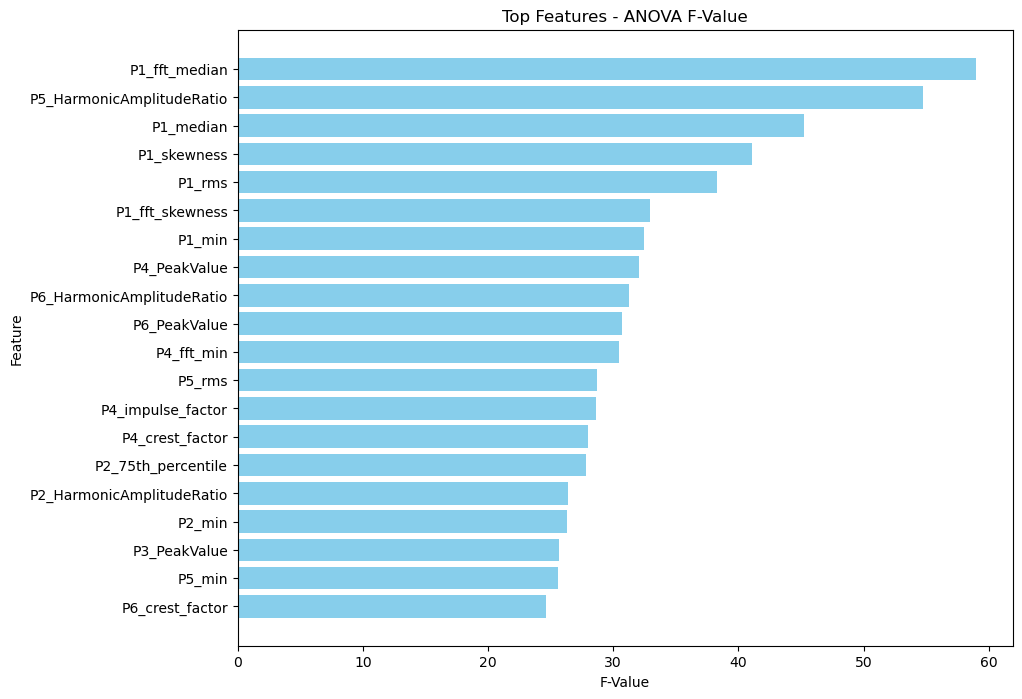

In [577]:
features = feature_selection_anova(df_train,df_labels["Condition"],20)

In [578]:
df_train=df_train[features]
df_test=df_test[features]

In [579]:
df_features = pd.concat([df_test],axis=0)

In [580]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_features)

df_features['Cluster'] = kmeans.labels_

/Users/alexdediu/anaconda3/envs/pytorch-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [581]:
df_features['Cluster'].values

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int32)

In [582]:
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='P1_rms', y='P5_rms', hue='Cluster', data=df_features, palette='viridis')
# plt.title('Clustering binario con K-means')
# plt.show()


In [583]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_features, kmeans.labels_)
print(f'Coefficiente di silhouette: {score}')

Coefficiente di silhouette: 0.9927461795885459


In [584]:
df_features.head()

,P1_fft_median,P5_HarmonicAmplitudeRatio,P1_median,P1_skewness,P1_rms,P1_fft_skewness,P1_min,P4_PeakValue,P6_HarmonicAmplitudeRatio,P6_PeakValue,...,P5_rms,P4_impulse_factor,P4_crest_factor,P2_75th_percentile,P2_HarmonicAmplitudeRatio,P2_min,P3_PeakValue,P5_min,P6_crest_factor,Cluster
178,0.615625,0.529602,0.495257,0.755085,0.687403,0.722514,0.371555,0.457453,0.671782,0.617778,...,0.538355,0.569653,0.573616,0.720100,0.702538,0.892153,0.488078,0.048438,0.690018,0
179,0.827104,0.428010,0.193701,0.458853,0.902002,0.402390,0.182168,0.332279,0.588214,0.587278,...,0.980064,0.439324,0.449432,0.797330,0.597118,0.007976,0.362610,0.003761,0.656619,0
181,0.917263,0.396816,0.047864,0.572967,0.976223,0.385496,0.162786,0.263616,0.519924,0.513779,...,0.930225,0.365127,0.373410,0.775503,0.536503,0.014086,0.339256,0.018448,0.590313,0
184,0.511773,0.472094,49.069842,0.077068,164.065211,0.496075,1.861598,0.265518,0.631157,0.542088,...,67.564014,0.028182,0.045917,27.936155,0.552172,1.726244,0.351758,1.884693,0.028507,1
186,0.201170,0.621510,0.267645,0.663037,0.188886,0.496104,0.307737,0.205421,0.847797,0.870133,...,0.682774,0.297364,0.307129,0.477301,0.603783,0.036904,0.275684,0.592579,0.879638,0


In [585]:
df_known = df_features.loc[df_features['Cluster'].isin([0])]


In [586]:
df_known = df_known.drop(columns="Cluster")

In [587]:
df_known

,P1_fft_median,P5_HarmonicAmplitudeRatio,P1_median,P1_skewness,P1_rms,P1_fft_skewness,P1_min,P4_PeakValue,P6_HarmonicAmplitudeRatio,P6_PeakValue,P4_fft_min,P5_rms,P4_impulse_factor,P4_crest_factor,P2_75th_percentile,P2_HarmonicAmplitudeRatio,P2_min,P3_PeakValue,P5_min,P6_crest_factor
178,0.615625,0.529602,0.495257,0.755085,0.687403,0.722514,0.371555,0.457453,0.671782,0.617778,0.425331,0.538355,0.569653,0.573616,0.720100,0.702538,0.892153,0.488078,0.048438,0.690018
179,0.827104,0.428010,0.193701,0.458853,0.902002,0.402390,0.182168,0.332279,0.588214,0.587278,0.678010,0.980064,0.439324,0.449432,0.797330,0.597118,0.007976,0.362610,0.003761,0.656619
181,0.917263,0.396816,0.047864,0.572967,0.976223,0.385496,0.162786,0.263616,0.519924,0.513779,0.637761,0.930225,0.365127,0.373410,0.775503,0.536503,0.014086,0.339256,0.018448,0.590313
186,0.201170,0.621510,0.267645,0.663037,0.188886,0.496104,0.307737,0.205421,0.847797,0.870133,0.687036,0.682774,0.297364,0.307129,0.477301,0.603783,0.036904,0.275684,0.592579,0.879638
188,0.739704,0.471278,0.228788,0.256862,0.784645,0.438886,-0.172830,0.304051,0.616498,0.642360,0.624407,0.941984,0.414499,0.416493,0.679189,0.559818,0.029750,0.389472,0.055736,0.705752
190,0.781682,0.431533,0.164763,0.589326,0.947702,0.398297,0.155755,0.277310,0.701148,0.574473,0.631390,0.940529,0.380559,0.388922,0.770602,0.526230,0.013683,0.356515,0.042128,0.642328
193,0.273815,0.851832,0.027104,0.651340,0.861145,0.079989,0.436355,0.293553,0.969590,0.601851,0.587909,0.767411,0.398487,0.408691,0.471871,0.982647,0.434062,0.395089,0.007586,0.671884
196,0.260782,0.800488,0.300295,0.986282,0.553230,0.590508,0.339054,0.789699,0.893415,0.798202,0.150131,0.257922,0.846391,0.851216,0.484101,0.921187,0.083833,0.694040,0.003234,0.851057
197,0.424018,0.263327,0.693373,0.595557,0.253273,0.720613,0.405805,0.077323,0.234216,0.180911,0.853804,0.649340,0.127145,0.134792,0.545799,0.324688,0.025448,0.110142,0.419350,0.231820
202,0.737811,0.339856,0.016741,0.701606,0.785012,0.308256,0.167160,0.250821,0.480677,0.311327,0.634719,0.812565,0.348455,0.350385,0.748350,0.430638,0.013006,0.274074,0.009720,0.386820


In [588]:
print(len(df_known))

19


In [589]:
df_train = df_train[105:]
df_labels = df_labels[105:]

In [590]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_labels["Condition"], test_size=0.33, random_state=123)

rid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=123),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

predictions = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

print("Best parameters found by grid search:")
print(grid_search.best_params_)


NameError: name 'param_grid' is not defined

In [ ]:
y_pred_values = random_forest.predict(df_known)
y_pred_values

array([3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3])

In [ ]:
idx= np.array(y_pred_values)

i_anomaly = np.where(idx == 3)[0]
i_fault=np.where(idx == 2)[0]


In [ ]:
df_anomaly_test = df_known.iloc[i_anomaly]
df_fault_test = df_known.iloc[i_fault]

In [ ]:
df_known

,P1_fft_median,P5_HarmonicAmplitudeRatio,P1_median,P1_skewness,P1_rms,P1_fft_skewness,P1_min,P4_PeakValue,P6_HarmonicAmplitudeRatio,P6_PeakValue,P4_fft_min,P5_rms,P4_impulse_factor,P4_crest_factor,P2_75th_percentile,P2_HarmonicAmplitudeRatio,P2_min,P3_PeakValue,P5_min,P6_crest_factor
178,0.615625,0.529602,0.495257,0.755085,0.687403,0.722514,0.371555,0.457453,0.671782,0.617778,0.425331,0.538355,0.569653,0.573616,0.720100,0.702538,0.892153,0.488078,0.048438,0.690018
179,0.827104,0.428010,0.193701,0.458853,0.902002,0.402390,0.182168,0.332279,0.588214,0.587278,0.678010,0.980064,0.439324,0.449432,0.797330,0.597118,0.007976,0.362610,0.003761,0.656619
181,0.917263,0.396816,0.047864,0.572967,0.976223,0.385496,0.162786,0.263616,0.519924,0.513779,0.637761,0.930225,0.365127,0.373410,0.775503,0.536503,0.014086,0.339256,0.018448,0.590313
186,0.201170,0.621510,0.267645,0.663037,0.188886,0.496104,0.307737,0.205421,0.847797,0.870133,0.687036,0.682774,0.297364,0.307129,0.477301,0.603783,0.036904,0.275684,0.592579,0.879638
188,0.739704,0.471278,0.228788,0.256862,0.784645,0.438886,-0.172830,0.304051,0.616498,0.642360,0.624407,0.941984,0.414499,0.416493,0.679189,0.559818,0.029750,0.389472,0.055736,0.705752
190,0.781682,0.431533,0.164763,0.589326,0.947702,0.398297,0.155755,0.277310,0.701148,0.574473,0.631390,0.940529,0.380559,0.388922,0.770602,0.526230,0.013683,0.356515,0.042128,0.642328
193,0.273815,0.851832,0.027104,0.651340,0.861145,0.079989,0.436355,0.293553,0.969590,0.601851,0.587909,0.767411,0.398487,0.408691,0.471871,0.982647,0.434062,0.395089,0.007586,0.671884
196,0.260782,0.800488,0.300295,0.986282,0.553230,0.590508,0.339054,0.789699,0.893415,0.798202,0.150131,0.257922,0.846391,0.851216,0.484101,0.921187,0.083833,0.694040,0.003234,0.851057
197,0.424018,0.263327,0.693373,0.595557,0.253273,0.720613,0.405805,0.077323,0.234216,0.180911,0.853804,0.649340,0.127145,0.134792,0.545799,0.324688,0.025448,0.110142,0.419350,0.231820
202,0.737811,0.339856,0.016741,0.701606,0.785012,0.308256,0.167160,0.250821,0.480677,0.311327,0.634719,0.812565,0.348455,0.350385,0.748350,0.430638,0.013006,0.274074,0.009720,0.386820


In [ ]:
# df_anomaly_test.to_csv(f"{path_dataframes}/df_test_bubble.csv")
# df_fault_test.to_csv(f"{path_dataframes}/df_test_sv.csv")


In [ ]:
df_fault_test

,P1_fft_median,P5_HarmonicAmplitudeRatio,P1_median,P1_skewness,P1_rms,P1_fft_skewness,P1_min,P4_PeakValue,P6_HarmonicAmplitudeRatio,P6_PeakValue,P4_fft_min,P5_rms,P4_impulse_factor,P4_crest_factor,P2_75th_percentile,P2_HarmonicAmplitudeRatio,P2_min,P3_PeakValue,P5_min,P6_crest_factor
179,0.827104,0.428010,0.193701,0.458853,0.902002,0.402390,0.182168,0.332279,0.588214,0.587278,0.678010,0.980064,0.439324,0.449432,0.797330,0.597118,0.007976,0.362610,0.003761,0.656619
181,0.917263,0.396816,0.047864,0.572967,0.976223,0.385496,0.162786,0.263616,0.519924,0.513779,0.637761,0.930225,0.365127,0.373410,0.775503,0.536503,0.014086,0.339256,0.018448,0.590313
188,0.739704,0.471278,0.228788,0.256862,0.784645,0.438886,-0.172830,0.304051,0.616498,0.642360,0.624407,0.941984,0.414499,0.416493,0.679189,0.559818,0.029750,0.389472,0.055736,0.705752
190,0.781682,0.431533,0.164763,0.589326,0.947702,0.398297,0.155755,0.277310,0.701148,0.574473,0.631390,0.940529,0.380559,0.388922,0.770602,0.526230,0.013683,0.356515,0.042128,0.642328
202,0.737811,0.339856,0.016741,0.701606,0.785012,0.308256,0.167160,0.250821,0.480677,0.311327,0.634719,0.812565,0.348455,0.350385,0.748350,0.430638,0.013006,0.274074,0.009720,0.386820
205,0.697160,0.331766,-0.007509,0.682604,0.837375,0.302448,0.165093,0.265915,0.457243,0.368340,0.617933,0.876174,0.369967,0.371778,0.741739,0.450047,0.012307,0.273186,0.003162,0.447442
211,0.689050,0.329359,0.000314,0.675268,0.811674,0.298990,0.159077,0.254988,0.458831,0.363320,0.630056,0.889466,0.356170,0.357931,0.745907,0.441412,0.012957,0.274647,0.003408,0.443243
212,0.724640,0.347295,0.016760,0.716743,0.880597,0.322882,0.174721,0.236886,0.451124,0.372561,0.650476,0.816773,0.334858,0.338125,0.707148,0.454923,0.012710,0.271269,0.002906,0.453334
214,1.014264,0.325654,0.079759,0.663028,0.685379,0.297430,0.250613,0.244517,0.421845,0.417743,0.641816,0.824912,0.343836,0.345134,0.759952,0.421329,0.013212,0.272986,0.086240,0.484356


In [ ]:
with open(f'{path_dataframes}/index_test_fault_task2.pkl', 'wb') as file:
    pickle.dump(df_fault_test.index.values, file)

with open(f'{path_dataframes}/index_test_anomaly_task2.pkl', 'wb') as file:
    pickle.dump(df_anomaly_test.index.values, file)